In [1]:
#Satinder Analytics. Kaggle Competition on Satinder dataset with anomymous variables
#The dataset has no information describing whatr it is. the variables are all anonymous. So here the task is to
#to look into this data and find out insights among the anonymous variables and 
#make judgement stricly on the insights obtained thrugh analysis

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset1 = pd.read_csv('train.csv')
dataset2 = pd.read_csv('test.csv')
X1 = dataset1.iloc[:, 2:].values#Train independent variable
X1_key = dataset1.iloc[:,2:].columns#Keys of the dataset
X2 = dataset2.iloc[:, 1:].values#test data set
Y1 = dataset1.iloc[:,1].values#predictions for train data set
#Y2 = dataset2.iloc[:,1].values there is no y2 yet

In [25]:
#X1_key = dataset1.iloc[:,2:].columns

In [27]:
#X1_key

In [10]:
dataset1.shape

(200000, 202)

In [4]:
#dataset1.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
dataset2.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [9]:
# Splitting the dataset into the Training set and Test set already done above
#X and Y1 are for train, while X2 are for test

In [8]:
testX = pd.DataFrame(X1, columns = X1_key)

In [8]:
testX1 = pd.DataFrame(dataset1.iloc[:,[5,6,7,8,9,10]].values, columns = ['var4','var5','var6','var7','var8','var9'])

In [15]:
testX1.head(3)

,var0,var1,var3
0,8.9255,-6.7863,11.9081
1,11.5006,-4.1473,13.8588
2,8.6093,-2.7457,12.0805


In [30]:
testX.head(2)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [18]:
#Check for the distribution of the data before scaling to see what type pf scaling to apply

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


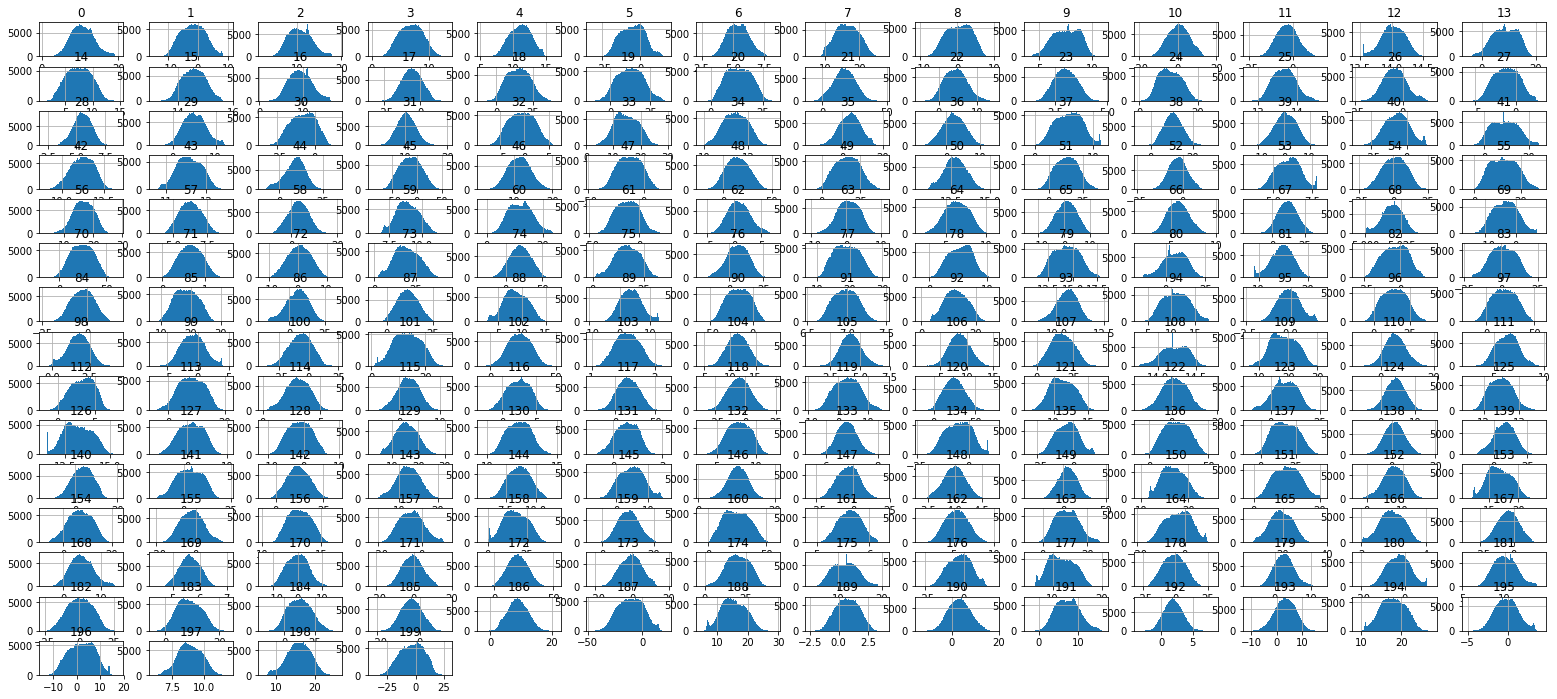

In [17]:
#Before scaling
plt.figure(figsize=(27, 12))
ax = plt.gca()
testX.hist(ax=ax, bins=75);
plt.show()
#Result show relatively normal distribution in all features
#Thus standard scaler is chosen as the scaling method 

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X1)
X_test = sc.transform(X2)
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

In [ ]:
##Work to reduce the features/dimensions to few important features so as to see what to apply

In [20]:
# Principal Component Analysis on Dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [21]:
explained_variance

array([0.00611308, 0.00530267, 0.00529862, 0.00529673, 0.00528794,
       0.00528269, 0.00527948, 0.00527426, 0.00526566, 0.00526283,
       0.00525555, 0.00524994, 0.00524602, 0.00523687, 0.00523581,
       0.00523504, 0.00522727, 0.00522382, 0.00521927, 0.00521826,
       0.00521497, 0.00521018, 0.00520729, 0.00520242, 0.00519975,
       0.0051945 , 0.00519299, 0.00519256, 0.00518746, 0.00518349,
       0.00518289, 0.0051783 , 0.00517394, 0.00516921, 0.00516632,
       0.00516597, 0.00516242, 0.00515977, 0.00515468, 0.00515336,
       0.00514949, 0.00514498, 0.00514259, 0.00514111, 0.00513703,
       0.00513446, 0.00513183, 0.00512903, 0.00512785, 0.00512514,
       0.00511907, 0.00511775, 0.00511637, 0.00511503, 0.00510941,
       0.00510631, 0.00510588, 0.00510316, 0.00510131, 0.00509822,
       0.00509533, 0.00509268, 0.00509112, 0.005088  , 0.00508395,
       0.0050805 , 0.0050792 , 0.00507578, 0.00507203, 0.00506889,
       0.00506791, 0.00506343, 0.00506223, 0.00505915, 0.00505

In [ ]:
##result above show that all features are significantly important in explaining the variance in the dataset
##with explained_variance ratio for all features hanging around 0.05

In [4]:
##Check for correlation among the features using pair plot and heat map
#XT = testX['var_0','var_1','var_2']

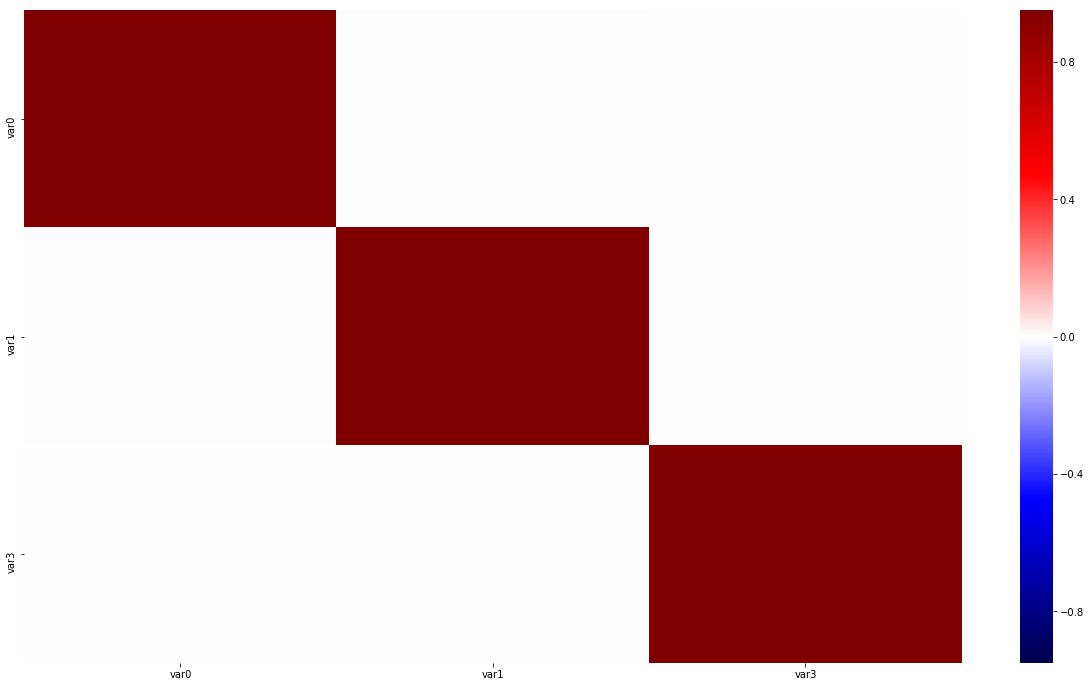

In [6]:
# Calcualte correlation
import seaborn as sns
corr = testX1.corr()

# plot the heatmap
plt.figure(figsize=(21, 12))
sns.heatmap(
            corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='seismic',
            vmin=-0.95,
            vmax=0.95
           )

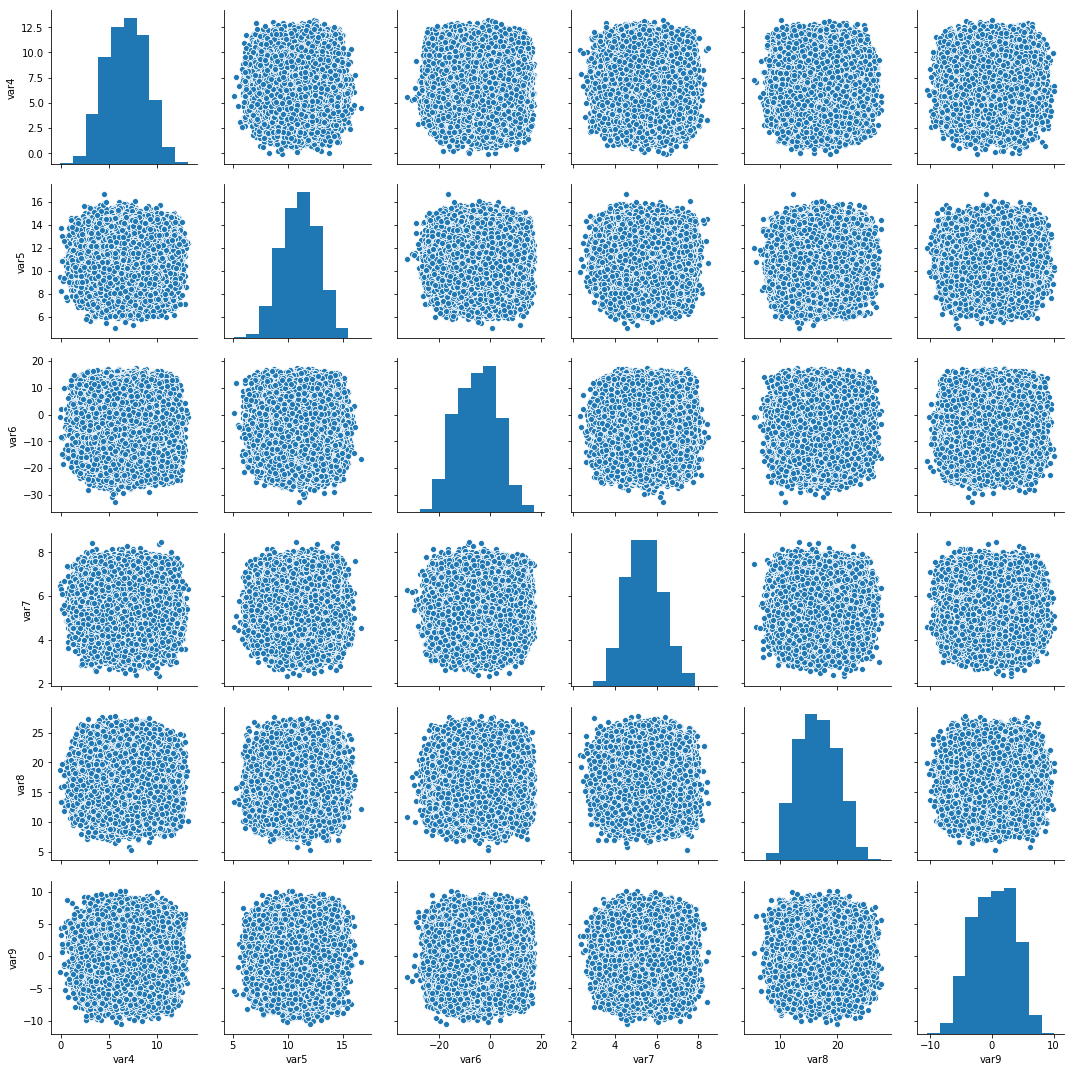

In [9]:
sns.pairplot(testX1)

In [10]:
#Insights from pair plot and cross plot corrlation show that all the variables are similar